In [1]:
# seq logo script from pdb files
import os

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patheffects
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from matplotlib import transforms
import re
import numpy as np
import seaborn
from collections import Counter

In [53]:
class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)
        
colors_scheme = {"A":[0.784,0.784,0.784],
                "C":[0.901,0.901,0.0],
                "E":[0.901,0.039,0.039],
                "D":[0.901,0.039,0.039],
                "G":[0.921,0.921,0.921],
                "F":[0.196,0.196,0.666],
                "I":[0.058,0.509,0.058],
                "H":[0.509,0.509,0.823],
                "K":[0.078,0.352,1.0],
                "M":[0.901,0.901,0.0],
                "L":[0.058,0.509,0.058],
                "N":[0.0,0.862,0.862],
                "Q":[0.0,0.862,0.862],
                "P":[0.862,0.588,0.509],
                "S":[0.980,0.588,0.0],
                "R":[0.078,0.352,1.0],
                "T":[0.980,0.588,0.0],
                "W":[0.705,0.352,0.705],
                "V":[0.058,0.509,0.058],
                "Y":[0.196,0.196,0.666],
                 "X":"black"}

def buildLogo(data, title):
    seaborn.set_style("whitegrid", {'axes.grid' : False})
    seaborn.despine()
    h = 2.5 #1 # 
    xScale =  1.075
    fig,ax = plt.subplots()
    fig.set_size_inches(len(data) * xScale , h * 1.5)

    xshift = 0
    xshifts = [0]
    trans_offset = transforms.offset_copy(ax.transAxes, 
                                      fig=fig, 
                                      x=0, 
                                      y=0, 
                                      units='dots')


    for i in range(0, len(data)):
        sc = data[i]
        sc.sort(key=lambda t: t[1])
        yshift = 0
        for base, score in sc:
            txt = ax.text(0, 0, base, 
                          transform=trans_offset,
                          fontsize=115, 
                          color=colors_scheme[base], 
                          family='monospace')

            txt.set_path_effects([Scale(0.80 * xScale, score*h)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score*h
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='dots') 

        xshift += window_ext.width * 1.2 * xScale / 1.075
        xshifts.append(xshift)
        trans_offset = mtrans.offset_copy(ax.transAxes, fig=fig, x=xshift, units='dots')


    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator((np.arange(1/60.0, 1 + 1/28.0, 1/28.0))))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter((positionsXRD)))
    ax.set_yticks(np.arange(0,2))
    plt.xticks(fontsize = 25) 
    plt.title(title, fontsize = 40)
    plt.ylabel(u"Частота", fontsize = 25)
    seaborn.despine()
    plt.show()

In [35]:
sc = []
sequence = [[] for a in range(224)]
positions = [33, 34, 36, 51, 53, 59, 99, 100, 101, 102, 103, 105, 142, 146, 147, 150, 162, 165, 166, 205, 206, 207, 208, 209, 212, 213, 214, 215]
             
# for labels
positionsXRD = [ 'H34', 'H35', 'H37', 'H52', 'H54', 'H60', 'H100', 'H101', 'H102', 'H103', 'H104', 'H106', 
                'L27', 'L31', 'L32','L35','L47','L50', 'L51', 'L90', 'L91', 'L92', 'L93', 'L94', 'L97', 'L98', 'L99', 'L100'] 
norm = float(len(sequence[0]))
for position in sequence:
    sc.append([[k[0],k[1]/norm] for k in Counter(position).iteritems()])
scores = [sc[i-1] for i in positions]

In [66]:
print "sele 123, resi " + "+".join([str(f) for f in positions])

sele 123, resi 33+34+36+51+53+59+99+100+101+102+103+105+142+146+147+150+162+165+166+205+206+207+208+209+212+213+214+215


In [72]:
#pymol selection for prf 9

In [70]:
print "sele 123, resi " + "+".join([str(a) for a in [34 ,
36 ,
51 ,
59 ,
99 ,
100,
103,
105,
247,
249,
250,
262,
265,
266,
305,
306,
307,
312,
313,
314,
315,
433,
248]])


sele 123, resi 34+36+51+59+99+100+103+105+247+249+250+262+265+266+305+306+307+312+313+314+315+433+248


In [ ]:
#pymol selection for prf 12_3

In [71]:
print "sele 123, resi " + "+".join([str(a) for a in [34, 
36, 
51 ,
59 ,
99 ,
100,
103,
105,
247,
249,
250,
265,
266,
305,
306,
307,
312,
313,
314,
433,
248]])


sele 123, resi 34+36+51+59+99+100+103+105+247+249+250+265+266+305+306+307+312+313+314+433+248


In [36]:
substitution = {}
for a in zip(positions,positionsXRD):
    substitution.update({a[0]:a[1]})

In [37]:
print " ".join(positionsXRD)

H34 H35 H37 H52 H54 H60 H100 H101 H102 H103 H104 H106 L27 L31 L32 L35 L47 L50 L51 L90 L91 L92 L93 L94 L97 L98 L99 L100


In [38]:
positions

[33,
 34,
 36,
 51,
 53,
 59,
 99,
 100,
 101,
 102,
 103,
 105,
 142,
 146,
 147,
 150,
 162,
 165,
 166,
 205,
 206,
 207,
 208,
 209,
 212,
 213,
 214,
 215]

In [59]:
mutations = []
os.chdir('/home/domain/data/kirill/AB/XOP/rosetta/several_ts/logo_generation/')
for f in os.listdir("."):
 #   if "sequences" not in f:
 #       continue
    with open("sequences_for_qm_stable") as sex:
        for seq in sex:
            if len(seq.split()) == 2: # if the sequences file has model names in the 1st column
                name, seq = seq.split()
                if name != "a5RY33Lprf12_3rel_61_55":
                    pass
                    #continue
                mutations.append("".join([seq[p-1] for p in positions]))
            if len(seq.split()) == 1:
                mutations.append("".join([seq[p-1] for p in positions]))
               

        sequence = []

        for a in range(len(positions)):
            pos = [m[a] for m in mutations]
            sequence.append(pos)

        scores = []
        norm = len(pos)
        for position in sequence:
            scores.append([[k[0],float(k[1])/norm] for k in Counter(position).iteritems()])
        break

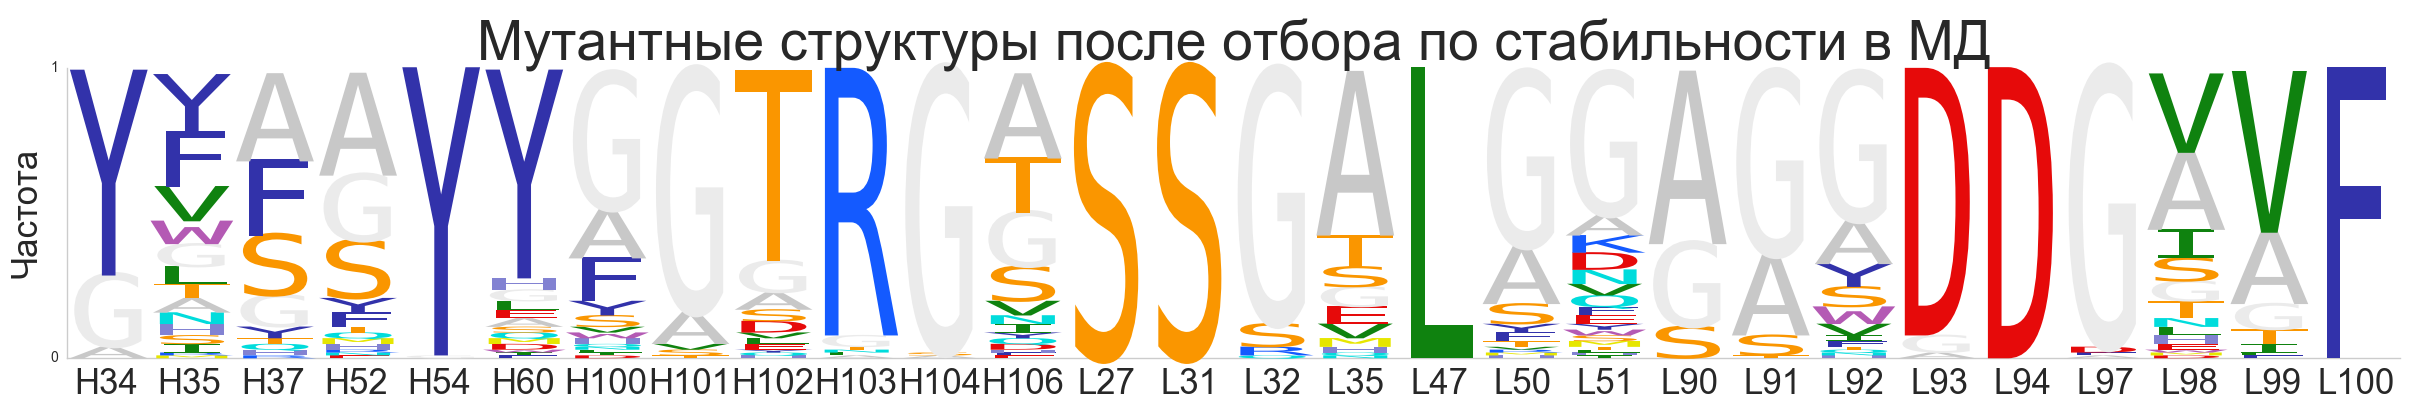

In [61]:
buildLogo(scores,u"Мутантные структуры после отбора по стабильности в МД")# re.search("_(.*)_{0,}",f).group(1))

In [9]:
scores

[[['Y', 1.0]],
 [['A', 1.0]],
 [['S', 1.0]],
 [['G', 1.0]],
 [['Y', 1.0]],
 [['E', 1.0]],
 [['A', 1.0]],
 [['G', 1.0]],
 [['T', 1.0]],
 [['R', 1.0]],
 [['G', 1.0]],
 [['E', 1.0]],
 [['S', 1.0]],
 [['S', 1.0]],
 [['G', 1.0]],
 [['V', 1.0]],
 [['A', 1.0]],
 [['L', 1.0]],
 [['A', 1.0]],
 [['S', 1.0]],
 [['G', 1.0]],
 [['G', 1.0]],
 [['Y', 1.0]],
 [['D', 1.0]],
 [['D', 1.0]],
 [['G', 1.0]],
 [['V', 1.0]],
 [['A', 1.0]],
 [['F', 1.0]]]

In [ ]:
# gro/pdb parser - very slow

In [ ]:
os.chdir('/home/domain/data/kirill/AB/XOP/rosetta/several_ts/')
files = []
for f in os.walk("."):
    if f[0][:4] == "./a5":
        files += ([f[0] + "/" + ff for ff in f[2] if ff.endswith(".pdb")])
        
        
sequence = [[] for a in range(224)]

def convert(res):
    dic = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M', "XOP":"X"}
    return dic[res]

for fil in files:
    if fil.endswith(".gro"):
        n = 0
        def getResNum(st):
            return int(re.findall("[0-9]{1,}",st[0])[0])
        def getResName(st):
            return re.findall("[A-Z]{3}",st[0])[0]
    if fil.endswith(".pdb"):
        n = 0
        def getResNum(st):
            return int(st[4])
        def getResName(st):
            return st[3] 
        
    with open(fil) as f:
        lines = f.readlines()
    lastRes = 0   
    res = 0
    for line in lines:  
        l = line.split()
        if len(l) < 2: 
            continue
               
        if fil.endswith(".pdb") and l[0] != "ATOM":
            continue
        if getResName(l).endswith("XOP"):
            break
        # extract residue numbers
        try:
            resNum = getResNum(l)
            if lastRes == resNum:
                continue
            #sequence.append([])  
            res += 1
        except IndexError:
            if l[0].endswith("Protein"):
                continue
            else:
                print "could not convert residue number to integer!"     
                print l
                continue
                
        # add the residue names
        try:
            resName = convert(getResName(l))
            sequence[res-1].append(resName) # this creates a list of positions with residue names occuring at this position: [["A","C",...][][][]]
            lastRes = resNum
        except KeyError:
               
                print "could not convert residue name to one letter code!" 
                print l
                break

        
       

In [ ]:
# copy the best to a separate dir

